## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools

digits = load_digits()
X = digits.data
y = digits.target

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.2)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 1-1 無調整任何參數

Recall metric in the testing dataset : 0.8416666666666667
accuracy metric in the testing dataset : 0.8376591427715228


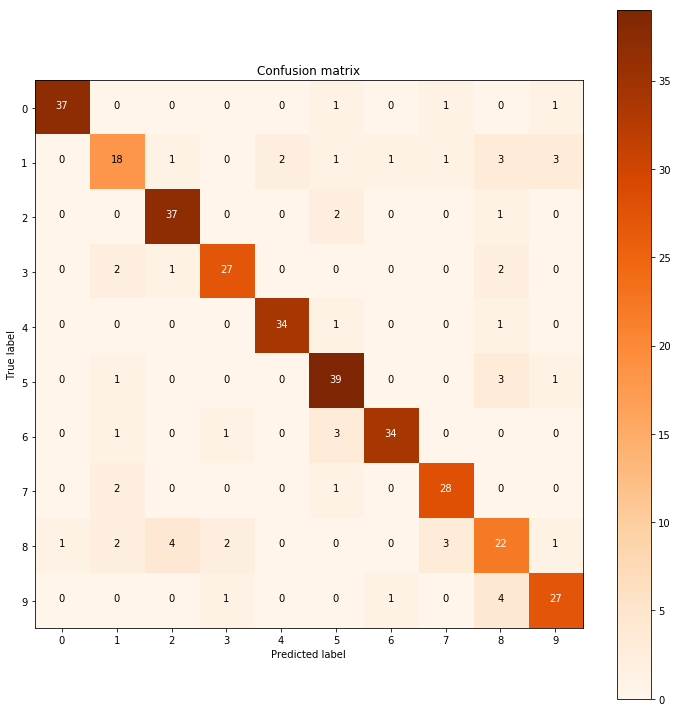

In [8]:
classifier = DecisionTreeClassifier(criterion = 'entropy' ,random_state = 0)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 10)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

## 1-2 調整參數讓決策樹的最大深度為10

Recall metric in the testing dataset : 0.8472222222222222
accuracy metric in the testing dataset : 0.8422294198491448


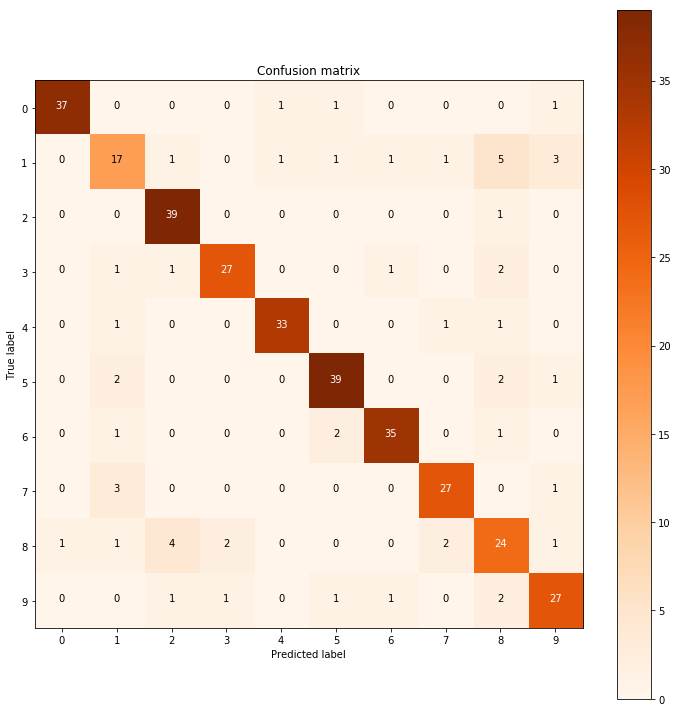

In [9]:
classifier = DecisionTreeClassifier(criterion = 'entropy'  , max_depth = 10 , random_state = 0)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 10)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 2-1 使用回歸模型

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
outcome = pd.DataFrame({'true_value':y_test , 'predict_value':y_pred})
print("The score of regressor : {}"\
      .format(regressor.score(X_train, y_train)))
print("Mean squared error : {}"\
      .format(mean_squared_error(y_test, y_pred)))

The score of regressor : 0.7729718726571158
Mean squared error : 33.45070896769115


C:\Users\peng\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


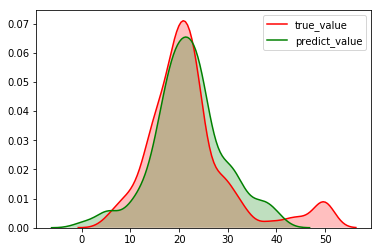

In [12]:
sns.kdeplot(outcome.iloc[: , 0] , shade=True, color="r")
sns.kdeplot(outcome.iloc[: , 1] , shade=True, color="g")

## 2-1 使用回歸樹

In [13]:
regressor = tree.DecisionTreeRegressor(criterion = 'mse' , max_depth = 10 , random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
outcome = pd.DataFrame({'true_value':y_test , 'predict_value':y_pred})
print("The score of regressor:{}"\
      .format(regressor.score(X_train, y_train)))
print("Mean squared error:{}"\
      .format(mean_squared_error(y_test, y_pred)))

The score of regressor:0.9938668914183634
Mean squared error:32.02463800528705


C:\Users\peng\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


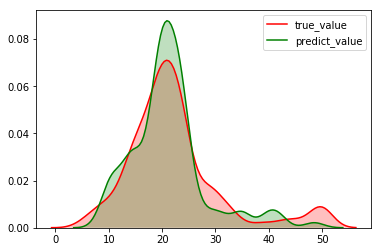

In [14]:
sns.kdeplot(outcome.iloc[: , 0] , shade=True, color="r")
sns.kdeplot(outcome.iloc[: , 1] , shade=True, color="g")